In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import requests

%matplotlib inline

### EDA

In [2]:
gc_members = pd.read_csv('../Data Files/NSS_GreatCare_Members.csv')
admissions = pd.read_csv('../Data Files/NSS_Hospital_Inpatient_Admissions.csv')
pc_visits = pd.read_csv('../Data Files/NSS_PrimaryCare_Office_Visits.csv')

C:\Users\pfbab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
admissions = admissions.astype({'Attending Provider NPI':object, 
                                'Encounter Start Date':'datetime64[ns]',
                                'Encounter End Date':'datetime64[ns]',
                                'CMS Admit Type Code':object,
                                'CMS Patient Discharge Status Code':object,
                                'CMS Place of Service Code':object})
pc_visits = pc_visits.astype({'Attending Provider NPI':object, 
                              'Facility Provider NPI':object, 
                              'Service Provider NPI':object, 
                              'Provider Group NPI':object,
                              'Encounter Date':'datetime64[ns]'})
gc_members = gc_members.astype({'Patient Date of Birth':'datetime64[ns]',
                                'Patient ZIP Code 5-Digit':object,
                                'Administratively Assigned PCP Provider NPI':object,
                                'Empirically Attributed PCP Individual Provider NPI':object,
                                'Empirically Attributed PCP Group Provider NPI':object,
                                'Primary Payor Description':object,
                                'CMS Dual Status Code':object,
                                'Period Start Date':'datetime64[ns]',
                                'Period End Date':'datetime64[ns]'})

In [4]:
admissions.head()

,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,...,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount
0,HIA|DS1|10033|DS1|NPI|1306890389|1,DS1|10033,DS1|1,DS1|5047W,DS1|NPI|1306890389,DS1|NPI|1417170523,1417170523.0,1306890389,2013-01-12,2013-01-14,...,1,1,21.0,NaN,NaN,O70.0,First degree perineal laceration during delivery,0,6620.72,250.0
1,HIA|DS1|10043|DS1|NPI|1902803315|1,DS1|10043,DS1|1,DS1|5047Y,DS1|NPI|1902803315,DS1|NPI|1669599197,1669599197.0,1902803315,2014-01-05,2014-01-12,...,1,1,21.0,348.4,Compression of brain,NaN,NaN,0,46465.40,250.0
2,HIA|DS1|10073|DS1|NPI|1902803315|1,DS1|10073,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1407880511,1407880511.0,1902803315,2012-06-13,2012-06-21,...,1,1,21.0,NaN,NaN,K91.71,Accidental puncture and laceration of a digest...,0,43879.13,250.0
3,HIA|DS1|10101|DS1|NPI|1427055839|1,DS1|10101,DS1|1,DS1|5047W,DS1|NPI|1427055839,DS1|NPI|1407008907,1407008907.0,1427055839,2012-12-06,2012-12-09,...,1,1,21.0,NaN,NaN,O70.1,Second degree perineal laceration during delivery,0,14800.00,250.0
4,HIA|DS1|10118|DS1|NPI|1992818256|1,DS1|10118,DS1|1,DS1|5047W,DS1|NPI|1992818256,DS1|NPI|1518045608,1518045608.0,1992818256,2015-03-11,2015-03-14,...,2,1,NaN,NaN,NaN,F32.9,"Major depressive disorder, single episode, uns...",0,0.00,0.0


In [5]:
admissions.columns

Index(['Encounter ID', 'Patient ID', 'Encounter Primary Payor ID',
       'Encounter Primary Plan ID', 'Facility Provider ID',
       'Attending Provider ID', 'Attending Provider NPI',
       'Facility Provider NPI', 'Encounter Start Date', 'Encounter End Date',
       'Is Emergency Department Visit Parent Encounter',
       'Is Observation Stay Parent Encounter', 'CMS Admit Type Code',
       'CMS Admit Source Code', 'CMS Patient Discharge Status Code',
       'CMS Place of Service Code',
       'Principal Discharge Diagnosis ICD-9-CM Code',
       'Principal Discharge Diagnosis ICD-9-CM Description',
       'Principal Discharge Diagnosis ICD-10-CM Code',
       'Principal Discharge Diagnosis ICD-10-CM Description',
       'Primary Plan Allowed Amount', 'Primary Plan Paid Amount',
       'Patient Paid Amount'],
      dtype='object')

In [6]:
admissions.shape

(6213, 23)

In [7]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1487856779.0,1043427248.0,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1528030996.0,1902803315.0,1528030996.0,1043427248.0,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1477579365.0,1043427248.0,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1821178088.0,1104842020.0,1821178088.0,1407058787.0,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1609004191.0,1184722779.0,2016-09-04,0,1,0,0,NaN


In [8]:
gc_members.head()

,Patient ID,Primary Plan ID,Primary Payor ID,Is Patient Alive,Patient Age Integer,Patient Date of Birth,Patient ZIP Code 5-Digit,Count Primary Care Visits in Last 36 Months,Count Visits with Attributee Individual Primary Care Provider i,Count Visits with Attributee Primary Care Provider Group in Las,...,Is CCW Prostate Cancer,Is CCW Rheumatoid Arthritis or Osteoarthritis,Is CCW Stroke or Transient Ischemic Attack,Is CCW ASCVD,Is CCW Anxiety Disorders,Is CCW Depressive Disorders,Is CCW Schizophrenia or Other Psychotic Disorders,Is CCW Bipolar Disorder,Period Start Date,Period End Date
0,DS1|1,DS1|5047W,DS1|1,1,54,1958-11-08,92111.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2013-01-01,2013-04-11
1,DS1|10,DS1|5047W,DS1|1,1,54,1958-12-10,90024.0,6,1.0,5.0,...,0,0,0,0,1,0,0,0,2012-12-10,2013-01-01
2,DS1|100,DS1|5047W,DS1|1,1,2,2012-08-04,90008.0,1,1.0,1.0,...,0,0,0,0,0,0,0,0,2015-04-18,2015-05-18
3,DS1|1000,DS1|5047W,DS1|1,1,6,2003-12-25,94131.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2010-01-01,2010-04-09
4,DS1|10000,DS1|5047W,DS1|1,1,7,2005-07-15,90301.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,2012-08-01,2012-10-02


In [9]:
gc_members.columns

Index(['Patient ID', 'Primary Plan ID', 'Primary Payor ID', 'Is Patient Alive',
       'Patient Age Integer', 'Patient Date of Birth',
       'Patient ZIP Code 5-Digit',
       'Count Primary Care Visits in Last 36 Months',
       'Count Visits with Attributee Individual Primary Care Provider i',
       'Count Visits with Attributee Primary Care Provider Group in Las',
       'Administratively Assigned PCP Provider NPI',
       'Empirically Attributed PCP Individual Provider NPI',
       'Empirically Attributed PCP Individual Provider Description',
       'Empirically Attributed PCP Group Provider NPI',
       'Empirically Attributed PCP Group Provider Description',
       'Primary Plan Description', 'Primary Payor Description',
       'Primary Plan Financial Class Description',
       'Is Primary Plan Financial Class Commercial',
       'Is Primary Plan Financial Class Medicare FFS',
       'Is Primary Plan Financial Class Medicare Advantage',
       'Is Primary Plan Financial Class M

### 1. What is our 30-day all cause readmission rate across hospitals our members are admitted to?

For each index event that each patient has, get only the **first** readmission within the 30 days following that index event.

In [10]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 23), (6149, 23))

In [11]:
def categorize_events(patient_admissions):
    patient_index_events = 0
    patient_readmission_events = 0
    last_index_event_discharge_date = None
    last_index_event_encounter_id = None
    readmission = False
    for ind, row in patient_admissions.iterrows():
        ##set first event as an intiial event or a non-qualifying readmission as initial event
        if patient_index_events == 0 or row['Encounter Start Date'] > last_index_event_discharge_date + dt.timedelta(days=30):
            patient_index_events += 1
            last_index_event_discharge_date = row['Encounter End Date']
            last_index_event_encounter_id = row['Encounter ID']
            readmission = False
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'index without readmission'
        ##check if qualifying readmission and change readmit status of most recently added initial event to true
        elif readmission == False:
            patient_readmission_events += 1
            readmission = True
            admissions.loc[admissions['Encounter ID'] == last_index_event_encounter_id, 'type'] = 'index w readmission'
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'initial readmission'
        ##check for duplicate readmission
        else:
            admissions.loc[admissions['Encounter ID'] == row['Encounter ID'], 'type'] = 'extra readmission'
            
    return patient_index_events, patient_readmission_events

In [12]:
total_index_events = 0
total_index_events_leading_to_readmission = 0

for patient in admissions_dedup['Patient ID'].unique():
    patient_admissions = admissions_dedup[admissions['Patient ID']==patient]
    times_admitted = patient_admissions.shape[0]
    if times_admitted > 1:
        patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
        ind, re = categorize_events(patient_admissions)
        total_index_events += ind
        total_index_events_leading_to_readmission += re
    else:
        encounter_id = patient_admissions['Encounter ID'].values[0]
        admissions.loc[admissions['Encounter ID'] == encounter_id, 'type'] = 'index without readmission'
        total_index_events += 1
print("Total Index Events:",total_index_events) 
print("Index Events Leading to Readmission:", total_index_events_leading_to_readmission)
print(str.format("Readmission Rate: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))

<ipython-input-12-45bfff96a76a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  patient_admissions = admissions_dedup[admissions['Patient ID']==patient]
<ipython-input-12-45bfff96a76a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 5536
Index Events Leading to Readmission: 527
Readmission Rate: 9.52%


In [13]:
admissions[['type']] = admissions[['type']].fillna(value='duplicate encounter')

### 2. What percent of patients have a PCP visit within a week of discharge?

In [14]:
pc_visits.head()

,Encounter ID,Patient ID,Service Provider ID,Attending Provider ID,Provider Group Provider ID,Facility Provider ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Attending Provider NPI,Facility Provider NPI,Service Provider NPI,Provider Group NPI,Encounter Date,Is Qualifying Preventive Primary Care Service,Is Qualifying Primary Care Service Provider,Is Qualifying Primary Care Attending,Is Qualifying Primary Care Provider Group,Qualifying Preventive Primary Care HCPCS Code
0,COV|EE|DS1|10076|20110225|DS1|NPI|1487856779,DS1|10076,DS1|NPI|1487856779,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1487856779.0,1043427248.0,2011-02-18,0,1,0,0,NaN
1,COV|EE|DS1|10088|20140222|DS1|NPI|1528030996,DS1|10088,DS1|NPI|1528030996,DS1|NPI|1528030996,DS1|NPI|1043427248,DS1|NPI|1902803315,DS1|1,DS1|5047W,1528030996.0,1902803315.0,1528030996.0,1043427248.0,2014-02-22,0,1,1,1,NaN
2,COV|EE|DS1|10165|20140907|DS1|NPI|1477579365,DS1|10165,DS1|NPI|1477579365,NaN,DS1|NPI|1043427248,NaN,DS1|1,DS1|5047W,NaN,NaN,1477579365.0,1043427248.0,2014-08-31,0,1,0,0,NaN
3,COV|EE|DS1|10240|20130624|DS1|NPI|1821178088,DS1|10240,DS1|NPI|1821178088,DS1|NPI|1821178088,DS1|NPI|1407058787,DS1|NPI|1104842020,DS1|1,DS1|5047W,1821178088.0,1104842020.0,1821178088.0,1407058787.0,2013-06-17,0,1,1,1,NaN
4,COV|EE|DS1|10293|20160904|DS1|NPI|1609004191,DS1|10293,DS1|NPI|1609004191,NaN,DS1|NPI|1184722779,NaN,DS1|1,DS1|5047X,NaN,NaN,1609004191.0,1184722779.0,2016-09-04,0,1,0,0,NaN


In [15]:
admissions_dedup = admissions.sort_values(by=['Patient ID','Encounter Start Date', 'Encounter End Date']).drop_duplicates(subset=['Patient ID', 'Encounter Start Date'], keep = 'last')
admissions_dedup = admissions_dedup.sort_values(by=['Patient ID','Encounter End Date', 'Encounter Start Date']).drop_duplicates(subset=['Patient ID', 'Encounter End Date'], keep = 'first')
admissions.shape, admissions_dedup.shape

((6213, 24), (6149, 24))

In [16]:
total_hospital_visits = admissions_dedup.shape[0]
total_pcp_visits_in_7_days = 0

for ind, row in admissions_dedup.iterrows():
    patient = row['Patient ID']
    discharge_date = row['Encounter End Date']
    
    for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
        if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
            total_pcp_visits_in_7_days += 1
            admissions.loc[admissions['Encounter ID']==row['Encounter ID'], '7 day followup'] = True
            break
            
print('Total Hospital Visits: ', total_hospital_visits)
print('Total PCP Visits in 7 Days: ', total_pcp_visits_in_7_days)
print(str.format("PCP Visit Rate: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))

Total Hospital Visits:  6149
Total PCP Visits in 7 Days:  1860
PCP Visit Rate: 30.25%


### 6. Are there certain patients we should focus on (e.g. frequent fliers)?

In [17]:
freq_fliers = admissions_dedup.loc[admissions.type == 'initial readmission']
freq_fliers = freq_fliers['Patient ID'].value_counts().reset_index()
freq_fliers.columns = ['patient_id','num_admissions']
freq_fliers = freq_fliers.head(10)
freq_fliers

,patient_id,num_admissions
0,DS1|3812,7
1,DS1|53241,5
2,DS1|37477,4
3,DS1|21926,4
4,DS1|10451,4
5,DS1|12422,4
6,DS1|13593,4
7,DS1|55609,4
8,DS1|3663,3
9,DS1|12364,3


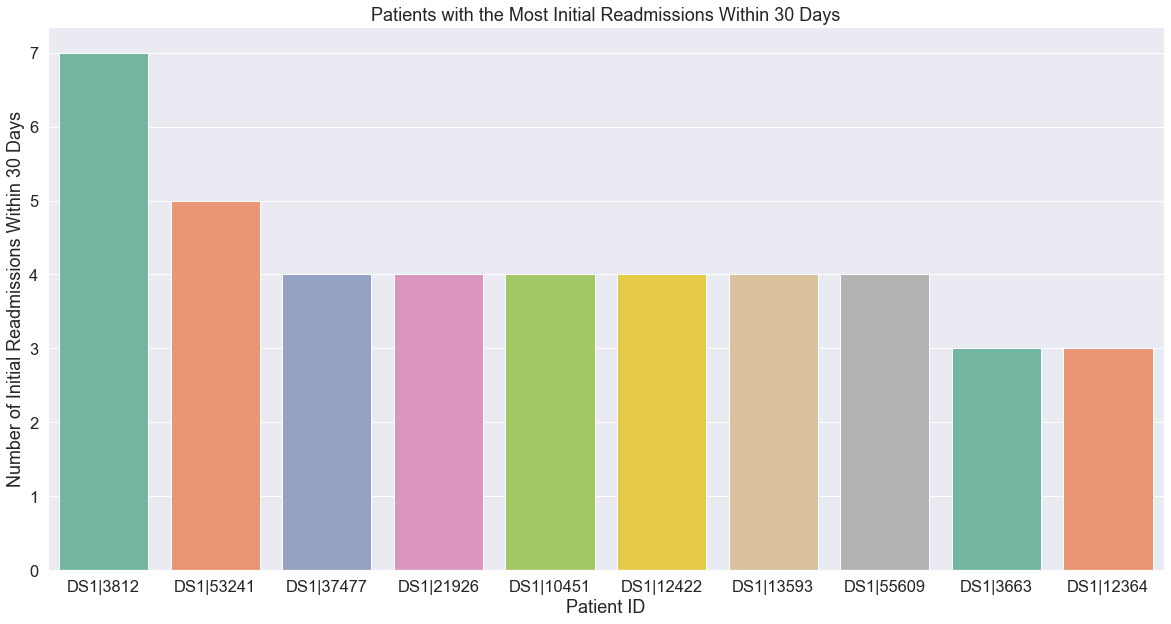

In [18]:
plt.figure(figsize = (20,10))
sns.set(style="darkgrid", font_scale=1.5)
sns.barplot(x = 'patient_id', y = 'num_admissions', data = freq_fliers, palette='Set2')
plt.xlabel('Patient ID')
plt.ylabel('Number of Initial Readmissions Within 30 Days')
plt.title('Patients with the Most Initial Readmissions Within 30 Days');

### Bonus: How does the readmission rate or rate of pc visits within 7 days differ among patients with different CCW conditions?

#### Merging and renaming

In [19]:
admissions_dedup.shape

(6149, 24)

In [20]:
ccw_admissions = pd.merge(admissions_dedup, gc_members, on='Patient ID', how='inner')

In [21]:
ccw_admissions.shape

(6149, 86)

In [22]:
ccw_admissions = ccw_admissions[['Patient ID', 'Encounter ID', 'Encounter Start Date', 
        'Encounter End Date', 'Count CCW Conditions', 
        'Is CCW Acquired Hypothyroidism', 'Is CCW Acute Myocardial Infarction', 
        'Is CCW Alzheimers Disease', 'Is CCW Alzheimers Disease and  Related Disorders or Senile Deme',
        'Is CCW Anemia', 'Is CCW Asthma', 'Is CCW Atrial Fibrillation',
        'Is CCW Benign Prostatic  Hyperplasia', 'Is CCW Breast Cancer',
        'Is CCW Cataract', 'Is CCW CKD', 'Is CCW COPD and Bronchiectasis',
        'Is CCW Colorectal Cancer', 'Is CCW Depression', 'Is CCW Diabetes',
        'Is CCW Endometrial Cancer', 'Is CCW Glaucoma', 'Is CCW Heart Failure',
        'Is CCW Hip or Pelvic Fracture', 'Is CCW Hyperlipidemia',
        'Is CCW Hypertension', 'Is CCW Ischemic Heart Disease',
        'Is CCW Lung Cancer', 'Is CCW Osteoporosis', 'Is CCW Prostate Cancer',
        'Is CCW Rheumatoid Arthritis or Osteoarthritis',
        'Is CCW Stroke or Transient Ischemic Attack', 'Is CCW ASCVD',
        'Is CCW Anxiety Disorders', 'Is CCW Depressive Disorders',
        'Is CCW Schizophrenia or Other Psychotic Disorders',
        'Is CCW Bipolar Disorder']]

In [23]:
ccw_admissions = ccw_admissions.rename(columns={'Patient ID':'Patient ID', 'Encounter ID':'Encounter ID', 'Encounter Start Date':'Encounter Start Date', 
        'Encounter End Date':'Encounter End Date', 'Count CCW Conditions':'count_conditions', 
        'Is CCW Acquired Hypothyroidism':'hypothyroidism', 'Is CCW Acute Myocardial Infarction':'acute_myocardial_infarction', 
        'Is CCW Alzheimers Disease':'alzheimers', 'Is CCW Alzheimers Disease and  Related Disorders or Senile Deme':'alzheimers_related',
        'Is CCW Anemia':'anemia', 'Is CCW Asthma':'asthma', 'Is CCW Atrial Fibrillation':'atrial_fibrillation',
        'Is CCW Benign Prostatic  Hyperplasia':'benign_prostatic_hyperplasia', 'Is CCW Breast Cancer':'breast_cancer',
        'Is CCW Cataract':'cataract', 'Is CCW CKD':'ckd', 'Is CCW COPD and Bronchiectasis':'copd_bronchiectasis',
        'Is CCW Colorectal Cancer':'colorectal_cancer', 'Is CCW Depression':'depression', 'Is CCW Diabetes':'diabetes',
        'Is CCW Endometrial Cancer':'endometrial_cancer', 'Is CCW Glaucoma':'glaucoma', 'Is CCW Heart Failure':'heart_failure',
        'Is CCW Hip or Pelvic Fracture':'hip_pelvic_fracture', 'Is CCW Hyperlipidemia':'hyperlipidemia',
        'Is CCW Hypertension':'hypertension', 'Is CCW Ischemic Heart Disease':'ischemic_heart_disease',
        'Is CCW Lung Cancer':'lung_cancer', 'Is CCW Osteoporosis':'osteoporosis', 'Is CCW Prostate Cancer':'prostate_cancer',
        'Is CCW Rheumatoid Arthritis or Osteoarthritis':'rheumatoid_osteoarthritis',
        'Is CCW Stroke or Transient Ischemic Attack':'transient_ischemic_attack', 'Is CCW ASCVD':'ascvd',
        'Is CCW Anxiety Disorders':'anxiety_disorders', 'Is CCW Depressive Disorders':'depressive_disorders',
        'Is CCW Schizophrenia or Other Psychotic Disorders':'schizophrenia_psychotic',
        'Is CCW Bipolar Disorder':'bipolar'})

In [24]:
ccw_admissions.head()

,Patient ID,Encounter ID,Encounter Start Date,Encounter End Date,count_conditions,hypothyroidism,acute_myocardial_infarction,alzheimers,alzheimers_related,anemia,...,lung_cancer,osteoporosis,prostate_cancer,rheumatoid_osteoarthritis,transient_ischemic_attack,ascvd,anxiety_disorders,depressive_disorders,schizophrenia_psychotic,bipolar
0,DS1|10,HIA|DS1|10|DS1|NPI|1710918545|1,2013-06-13,2013-06-16,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,DS1|10033,HIA|DS1|10033|DS1|NPI|1306890389|1,2013-01-12,2013-01-14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DS1|10043,HIA|DS1|10043|DS1|NPI|1902803315|1,2014-01-05,2014-01-12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DS1|10073,HIA|DS1|10073|DS1|NPI|1902803315|1,2012-06-13,2012-06-21,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DS1|10101,HIA|DS1|10101|DS1|NPI|1427055839|1,2012-12-06,2012-12-09,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Readmission Rate

In [25]:
def categorize_events(patient_admissions):
    patient_index_events = 0
    patient_readmission_events = 0
    last_index_event_discharge_date = None
    last_index_event_encounter_id = None
    readmission = False
    for ind, row in patient_admissions.iterrows():
        if patient_index_events == 0 or row['Encounter Start Date'] > last_index_event_discharge_date + dt.timedelta(days=30):
            patient_index_events += 1
            last_index_event_discharge_date = row['Encounter End Date']
            last_index_event_encounter_id = row['Encounter ID']
            readmission = False
        elif readmission == False:
            patient_readmission_events += 1
            readmission = True
    return patient_index_events, patient_readmission_events

In [26]:
ccw_admissions.columns[5:]

Index(['hypothyroidism', 'acute_myocardial_infarction', 'alzheimers',
       'alzheimers_related', 'anemia', 'asthma', 'atrial_fibrillation',
       'benign_prostatic_hyperplasia', 'breast_cancer', 'cataract', 'ckd',
       'copd_bronchiectasis', 'colorectal_cancer', 'depression', 'diabetes',
       'endometrial_cancer', 'glaucoma', 'heart_failure',
       'hip_pelvic_fracture', 'hyperlipidemia', 'hypertension',
       'ischemic_heart_disease', 'lung_cancer', 'osteoporosis',
       'prostate_cancer', 'rheumatoid_osteoarthritis',
       'transient_ischemic_attack', 'ascvd', 'anxiety_disorders',
       'depressive_disorders', 'schizophrenia_psychotic', 'bipolar'],
      dtype='object')

In [27]:
#ccw = ccw_admissions.loc[ccw_admissions.bipolar == 1] #replace column name for each ccw condition

readmission_rate = []
for column in ccw_admissions.columns[5:]: #added
    total_index_events = 0
    total_index_events_leading_to_readmission = 0
    print(column) #added
    ccw = ccw_admissions.loc[ccw_admissions[column] == 1]
    for patient in ccw['Patient ID'].unique():
        patient_admissions = ccw[ccw['Patient ID']==patient]
        times_admitted = patient_admissions.shape[0]
        if times_admitted > 1:
            patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
            ind, re = categorize_events(patient_admissions)
            total_index_events += ind
            total_index_events_leading_to_readmission += re
        else:
            encounter_id = patient_admissions['Encounter ID'].values[0]
            total_index_events += 1
    print("Total Index Events:",total_index_events) 
    print("Index Events Leading to Readmission:", total_index_events_leading_to_readmission)
    print(str.format("Readmission Rate: {}%",round(total_index_events_leading_to_readmission/total_index_events*100,2)))
    readmission_rate.append(round(total_index_events_leading_to_readmission/total_index_events*100,2)) #added

hypothyroidism
Total Index Events: 182
Index Events Leading to Readmission: 21
Readmission Rate: 11.54%
acute_myocardial_infarction
Total Index Events: 23
Index Events Leading to Readmission: 3
Readmission Rate: 13.04%
alzheimers
Total Index Events:

<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_adm

 4
Index Events Leading to Readmission: 1
Readmission Rate: 25.0%
alzheimers_related
Total Index Events: 29
Index Events Leading to Readmission: 6
Readmission Rate: 20.69%
anemia


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 562
Index Events Leading to Readmission: 131
Readmission Rate: 23.31%
asthma
Total Index Events: 186
Index Events Leading to Readmission: 24
Readmission Rate: 12.9%
atrial_fibrillation
Total Index Events: 62
Index Events Leading to Readmission: 18
Readmission Rate: 29.03%
benign_prostatic_hyperplasia
Total Index Events: 32
Index Events Leading to Readmission: 5
Readmission Rate: 15.62%
breast_cancer


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_adm

Total Index Events: 49
Index Events Leading to Readmission: 2
Readmission Rate: 4.08%
cataract
Total Index Events: 74
Index Events Leading to Readmission: 16
Readmission Rate: 21.62%
ckd
Total Index Events: 458
Index Events Leading to Readmission: 123
Readmission Rate: 26.86%
copd_bronchiectasis
Total Index Events: 90
Index Events Leading to Readmission: 16
Readmission Rate: 17.78%
colorectal_cancer
Total Index Events: 36
Index Events Leading to Readmission: 11
Readmission Rate: 30.56%
depression


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_adm

Total Index Events: 371
Index Events Leading to Readmission: 59
Readmission Rate: 15.9%
diabetes


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 460
Index Events Leading to Readmission: 84
Readmission Rate: 18.26%
endometrial_cancer
Total Index Events: 26
Index Events Leading to Readmission: 6
Readmission Rate: 23.08%
glaucoma
Total Index Events: 97
Index Events Leading to Readmission: 15
Readmission Rate: 15.46%
heart_failure
Total Index Events:

<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_adm

 182
Index Events Leading to Readmission: 46
Readmission Rate: 25.27%
hip_pelvic_fracture
Total Index Events: 10
Index Events Leading to Readmission: 2
Readmission Rate: 20.0%
hyperlipidemia


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 406
Index Events Leading to Readmission: 61
Readmission Rate: 15.02%
hypertension


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 695
Index Events Leading to Readmission: 124
Readmission Rate: 17.84%
ischemic_heart_disease


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 353
Index Events Leading to Readmission: 59
Readmission Rate: 16.71%
lung_cancer
Total Index Events: 29
Index Events Leading to Readmission: 9
Readmission Rate: 31.03%
osteoporosis
Total Index Events: 44
Index Events Leading to Readmission: 9
Readmission Rate: 20.45%
prostate_cancer
Total Index Events: 29
Index Events Leading to Readmission: 6
Readmission Rate: 20.69%
rheumatoid_osteoarthritis


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_adm

Total Index Events: 342
Index Events Leading to Readmission: 50
Readmission Rate: 14.62%
transient_ischemic_attack
Total Index Events: 61
Index Events Leading to Readmission: 17
Readmission Rate: 27.87%
ascvd


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 187
Index Events Leading to Readmission: 31
Readmission Rate: 16.58%
anxiety_disorders


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 269
Index Events Leading to Readmission: 47
Readmission Rate: 17.47%
depressive_disorders


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


Total Index Events: 294
Index Events Leading to Readmission: 53
Readmission Rate: 18.03%
schizophrenia_psychotic
Total Index Events: 21
Index Events Leading to Readmission: 3
Readmission Rate: 14.29%
bipolar
Total Index Events: 29
Index Events Leading to Readmission: 5
Readmission Rate: 17.24%


<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)
<ipython-input-27-a03cc198a0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_admissions.sort_values(by = 'Encounter End Date', inplace=True, ignore_index=True)


In [28]:
readmission_rate

[11.54,
 13.04,
 25.0,
 20.69,
 23.31,
 12.9,
 29.03,
 15.62,
 4.08,
 21.62,
 26.86,
 17.78,
 30.56,
 15.9,
 18.26,
 23.08,
 15.46,
 25.27,
 20.0,
 15.02,
 17.84,
 16.71,
 31.03,
 20.45,
 20.69,
 14.62,
 27.87,
 16.58,
 17.47,
 18.03,
 14.29,
 17.24]

In [29]:
ccw.shape

(36, 37)

- No CCW Conditions: 6.59%
- 1 or more CCW Conditions: 14.65%

In [30]:
ccw_measures = pd.DataFrame({'ccw_condition':['Hypothyroidism','Acute Myocardial Infarction', 
                                                        'Alzheimers Disease','Alzheimers Disease and Related Disorders',
                                                        'Anemia', 'Asthma', 'Atrial Fibrillation',
                                                        'Benign Prostatic Hyperplasia', 'Breast Cancer',
                                                        'Cataract', 'CKD', 'COPD and Bronchiectasis',
                                                        'Colorectal Cancer', 'Depression', 'Diabetes',
                                                        'Endometrial Cancer', 'Glaucoma', 'Heart Failure',
                                                        'Hip or Pelvic Fracture', 'Hyperlipidemia',
                                                        'Hypertension', 'Ischemic Heart Disease',
                                                        'Lung Cancer', 'Osteoporosis', 'Prostate Cancer',
                                                        'Rheumatoid Arthritis',
                                                        'Stroke or Transient Ischemic Attack', 'ASCVD',
                                                        'Anxiety Disorders', 'Depressive Disorders',
                                                        'Schizophrenia or Other Psychotic Disorders',
                                                        'Bipolar Disorder'],
                                        'readmission_rate':readmission_rate})

#### PC Visit Rate

In [31]:
ccw_admissions.columns[5:]

Index(['hypothyroidism', 'acute_myocardial_infarction', 'alzheimers',
       'alzheimers_related', 'anemia', 'asthma', 'atrial_fibrillation',
       'benign_prostatic_hyperplasia', 'breast_cancer', 'cataract', 'ckd',
       'copd_bronchiectasis', 'colorectal_cancer', 'depression', 'diabetes',
       'endometrial_cancer', 'glaucoma', 'heart_failure',
       'hip_pelvic_fracture', 'hyperlipidemia', 'hypertension',
       'ischemic_heart_disease', 'lung_cancer', 'osteoporosis',
       'prostate_cancer', 'rheumatoid_osteoarthritis',
       'transient_ischemic_attack', 'ascvd', 'anxiety_disorders',
       'depressive_disorders', 'schizophrenia_psychotic', 'bipolar'],
      dtype='object')

In [32]:
#ccw_pc = ccw_admissions.loc[ccw_admissions.bipolar == 1] #replace column name for each ccw condition
pc_visit_rate = []
for column in ccw_admissions.columns[5:]:
    print(column)
    ccw_pc = ccw_admissions.loc[ccw_admissions[column] == 1]
    total_hospital_visits = ccw_pc.shape[0]
    total_pcp_visits_in_7_days = 0

    for ind, row in ccw_pc.iterrows():
        patient = row['Patient ID']
        discharge_date = row['Encounter End Date']

        for i,r in pc_visits[pc_visits['Patient ID']==patient].iterrows():
            if r['Encounter Date'] <= discharge_date + dt.timedelta(days=7) and r['Encounter Date'] >= discharge_date:
                total_pcp_visits_in_7_days += 1
                break

    print('Total Hospital Visits: ', total_hospital_visits)
    print('Total PCP Visits in 7 Days: ', total_pcp_visits_in_7_days)
    print(str.format("PCP Visit Rate: {}%",round(total_pcp_visits_in_7_days/total_hospital_visits*100,2)))
    pc_visit_rate.append(round(total_pcp_visits_in_7_days/total_hospital_visits*100,2))

hypothyroidism
Total Hospital Visits:  205
Total PCP Visits in 7 Days:  67
PCP Visit Rate: 32.68%
acute_myocardial_infarction
Total Hospital Visits:  26
Total PCP Visits in 7 Days:  6
PCP Visit Rate: 23.08%
alzheimers
Total Hospital Visits:  6
Total PCP Visits in 7 Days:  3
PCP Visit Rate: 50.0%
alzheimers_related
Total Hospital Visits:  37
Total PCP Visits in 7 Days:  8
PCP Visit Rate: 21.62%
anemia
Total Hospital Visits:  718
Total PCP Visits in 7 Days:  186
PCP Visit Rate: 25.91%
asthma
Total Hospital Visits:  213
Total PCP Visits in 7 Days:  73
PCP Visit Rate: 34.27%
atrial_fibrillation
Total Hospital Visits:  87
Total PCP Visits in 7 Days:  28
PCP Visit Rate: 32.18%
benign_prostatic_hyperplasia
Total Hospital Visits:  38
Total PCP Visits in 7 Days:  6
PCP Visit Rate: 15.79%
breast_cancer
Total Hospital Visits:  51
Total PCP Visits in 7 Days:  9
PCP Visit Rate: 17.65%
cataract
Total Hospital Visits:  93
Total PCP Visits in 7 Days:  23
PCP Visit Rate: 24.73%
ckd
Total Hospital Visit

In [33]:
pc_visit_rate

[32.68,
 23.08,
 50.0,
 21.62,
 25.91,
 34.27,
 32.18,
 15.79,
 17.65,
 24.73,
 28.03,
 22.94,
 4.17,
 27.6,
 26.25,
 12.12,
 29.2,
 24.89,
 25.0,
 27.62,
 27.5,
 24.76,
 9.76,
 25.45,
 27.03,
 21.34,
 30.12,
 27.23,
 30.65,
 28.09,
 16.0,
 33.33]

- No CCW Conditions: 27.35%
- 1 or more CCW Conditions: 32.06%

In [34]:
ccw_measures['pc_visit_rate'] = pc_visit_rate

#### Visualizations

In [35]:
ccw_measures_read = ccw_measures.sort_values('readmission_rate', ascending=False)
ccw_measures_read

,ccw_condition,readmission_rate,pc_visit_rate
22,Lung Cancer,31.03,9.76
12,Colorectal Cancer,30.56,4.17
6,Atrial Fibrillation,29.03,32.18
26,Stroke or Transient Ischemic Attack,27.87,30.12
10,CKD,26.86,28.03
17,Heart Failure,25.27,24.89
2,Alzheimers Disease,25.00,50.00
4,Anemia,23.31,25.91
15,Endometrial Cancer,23.08,12.12
9,Cataract,21.62,24.73


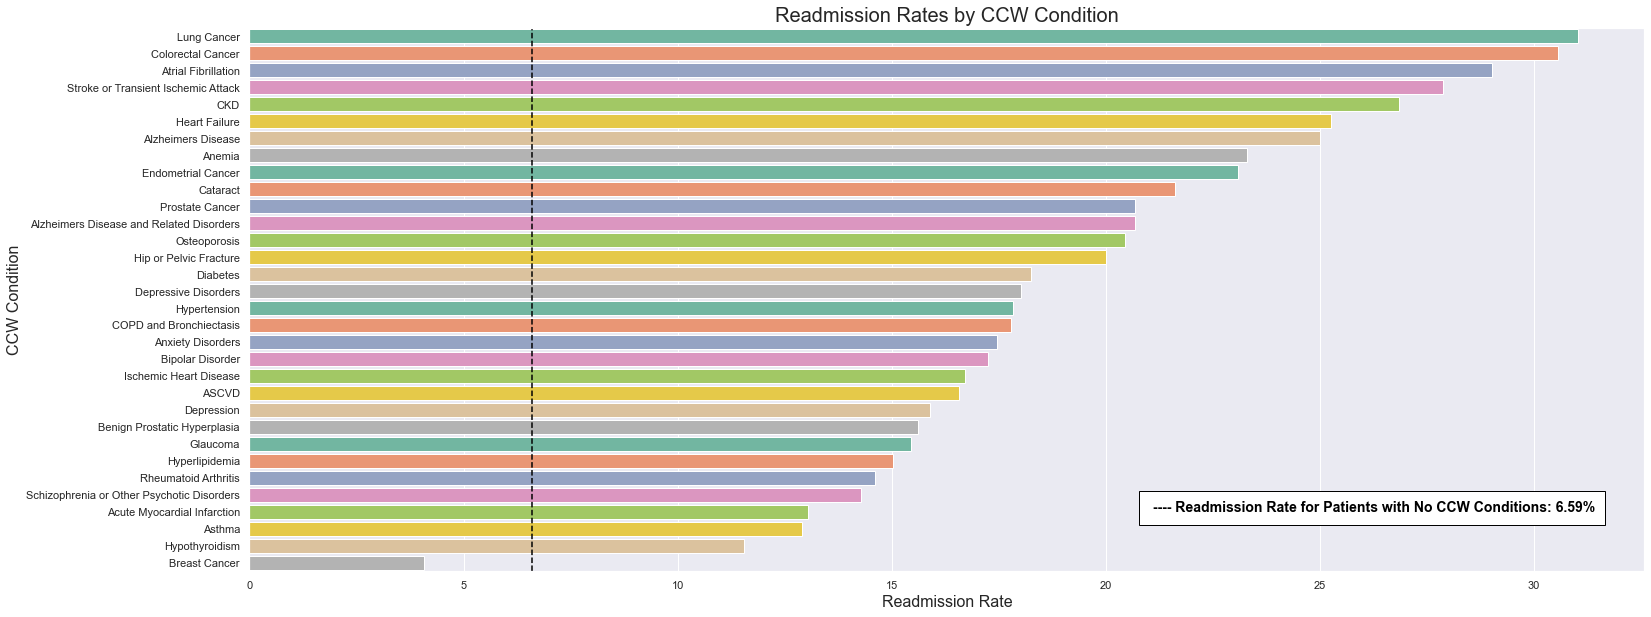

In [36]:
plt.figure(figsize = (25,10))
sns.set(style="darkgrid")
graph = sns.barplot(x = 'readmission_rate', y = 'ccw_condition', data = ccw_measures_read, palette='Set2')
graph.axvline(6.59, linestyle='--',color='black')
t = graph.text(21,28, ' ---- Readmission Rate for Patients with No CCW Conditions: 6.59%', size=14, color = 'black', weight='bold')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black', pad=10))
#plt.xticks(rotation=45)
plt.ylabel('CCW Condition',fontsize=16)
plt.xlabel('Readmission Rate', fontsize=16)
plt.title('Readmission Rates by CCW Condition', fontsize=20);

In [37]:
ccw_measures_pc = ccw_measures.sort_values('pc_visit_rate', ascending=False)
ccw_measures_pc

,ccw_condition,readmission_rate,pc_visit_rate
2,Alzheimers Disease,25.00,50.00
5,Asthma,12.90,34.27
31,Bipolar Disorder,17.24,33.33
0,Hypothyroidism,11.54,32.68
6,Atrial Fibrillation,29.03,32.18
28,Anxiety Disorders,17.47,30.65
26,Stroke or Transient Ischemic Attack,27.87,30.12
16,Glaucoma,15.46,29.20
29,Depressive Disorders,18.03,28.09
10,CKD,26.86,28.03


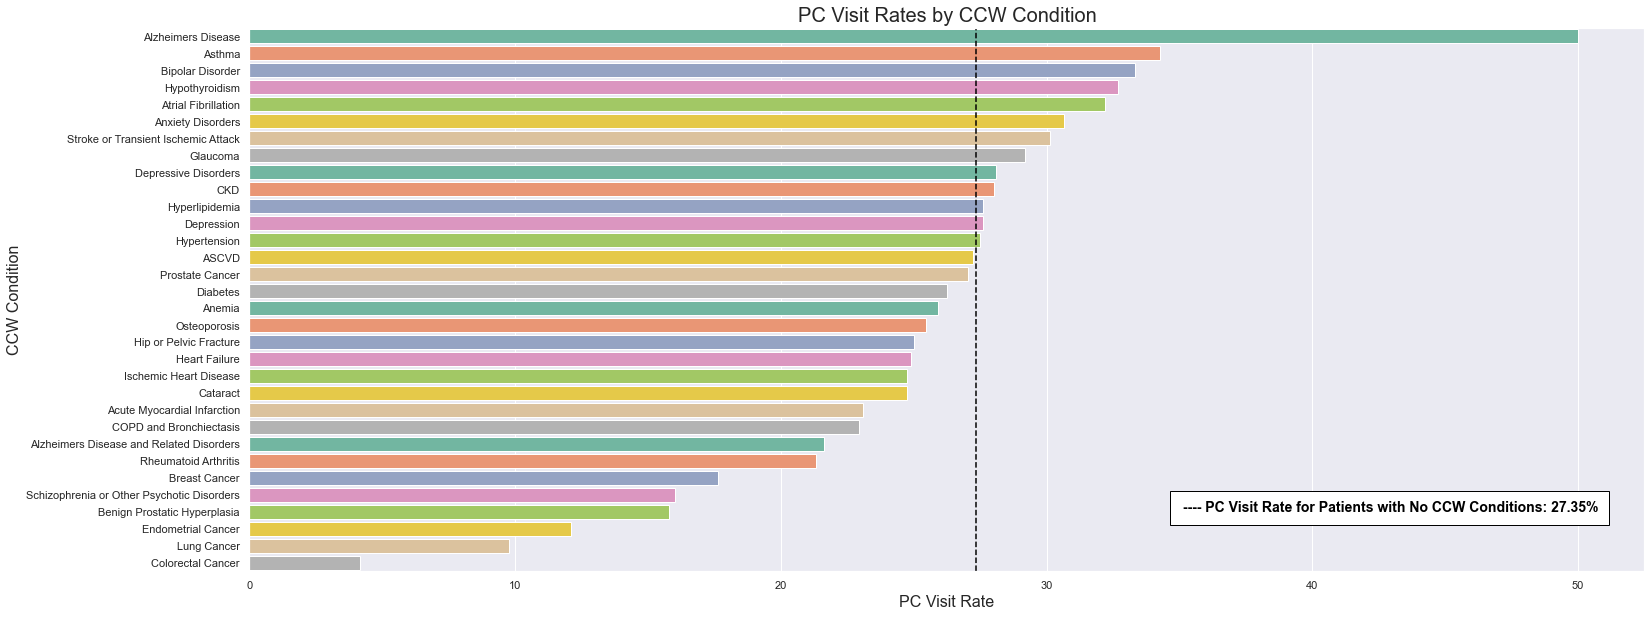

In [38]:
plt.figure(figsize = (25,10))
sns.set(style="darkgrid")
graph = sns.barplot(x = 'pc_visit_rate', y = 'ccw_condition', data = ccw_measures_pc, palette='Set2')
graph.axvline(27.35, linestyle='--',color='black')
t = graph.text(35,28, ' ---- PC Visit Rate for Patients with No CCW Conditions: 27.35%', size=14, color = 'black', weight='bold')
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='black', pad=10))
#plt.xticks(rotation=45)
plt.ylabel('CCW Condition',fontsize=16)
plt.xlabel('PC Visit Rate', fontsize=16)
plt.title('PC Visit Rates by CCW Condition', fontsize=20);